# Deep Learning Approach 

There are 2 significant parts of data.
- Shop details
- Past foot traffic

As part of Deep Learning approach, we will:
- Fit a model for foot traffic
- Cluster data to generate extra features to overcome issues of Sparse data
- Fit a model to improve accuracy by utilizing Shop details

# Milestones:

- Neural Network - 2 layer, with 15 inputs and 1 output
- Neural Network - 2 layer, with 15 inputs and 15 output after filtering out stores missing data (No NAs)
- Neural Network - 2 layer, with 15 inputs and 15 outputs on Sparse / Full dataset
- Neural Network - 3 layer, with 15 inputs, 30 hidden nodes and 15 outputs
- Convolutional Network - Cluster similar stores and generate new hidden features. We will be refering to research paper [Clustering using Convolution](https://arxiv.org/abs/1511.06241 "arXiv:1511.06241v2")
- LSTM Network to better learn patterns in foot traffic
- Create a Deep Learning architecture using the learnings from above Networks.

# Milestone 1:

## Reshaping Data
In order to create a model in machine learning, we need to have inputs and ouputs. Hence, if we are trying to machine learn daily foot traffic, we will have to divide it in inputs/ouputs. Assuming, we will feed 15 days of data to predict next 15 days, we need to have a 2 matrix of [nx15]. 

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pandas.tools.plotting import autocorrelation_plot
matplotlib.style.use('ggplot')
pd.set_option("display.max_rows",10)
plt.rcParams["figure.figsize"]  = [10,7] # width, height

In [2]:
data = pd.read_pickle("cff_15dayperiod.pkl")
data.shape

(5467, 31)

In [3]:
data

shop_id input_foot_traffic                                            \
day                           0      1      2      3      4      5      6   
0          1              268.0  218.0  224.0  260.0  267.0  243.0  272.0   
1          1              225.0  264.0  233.0  424.0  419.0  539.0  267.0   
2          1              257.0  272.0  267.0  310.0  261.0  253.0  266.0   
3          1              304.0  320.0  419.0  397.0  393.0  349.0  393.0   
4          1              337.0  238.0  352.0  339.0  356.0  230.0  254.0   
...      ...                ...    ...    ...    ...    ...    ...    ...   
5462    2000              124.0  134.0  153.0  102.0  143.0   43.0   39.0   
5463    2000              216.0  169.0  184.0  161.0   53.0   76.0  177.0   
5464    2000               31.0   51.0   52.0  162.0  166.0  170.0  160.0   
5465    2000              159.0   43.0   43.0   53.0   37.0   38.0   80.0   
5466    2000               87.0   64.0  179.0  175.0  178.0  200.0  151.0   

                    ...   output_foot_traffic                              \
day       7      8  ...                     5      6      7      8      9   
0     320.0  262.0  ...                 272.0  320.0  262.0  275.0  297.0   
1     282.0  302.0  ...                 267.0  282.0  302.0  343.0  265.0   
2     281.0  272.0  ...                 266.0  281.0  272.0  288.0  353.0   
3     364.0  317.0  ...                 393.0  364.0  317.0  383.0  364.0   
4     226.0  242.0  ...                 254.0  226.0  242.0  272.0  297.0   
...     ...    ...  ...                   ...    ...    ...    ...    ...   
5462  190.0  131.0  ...                  39.0  190.0  131.0  185.0  207.0   
5463  195.0  187.0  ...                 177.0  195.0  187.0  168.0  171.0   
5464  187.0  142.0  ...                 160.0  187.0  142.0   53.0   70.0   
5465   79.0  174.0  ...                  80.0   79.0  174.0  200.0  196.0   
5466   72.0   63.0  ...                 151.0   72.0   63.0  181.0  195.0   

                                         
day      10     11     12     13     14  
0     243.0  220.0  237.0  265.0  288.0  
1     284.0  273.0  294.0  285.0  257.0  
2     322.0  332.0  302.0  296.0  304.0  
3     337.0  296.0  312.0  339.0  337.0  
4     258.0  250.0  254.0  194.0  206.0  
...     ...    ...    ...    ...    ...  
5462  163.0   80.0   63.0  188.0  216.0  
5463   98.0  130.0  259.0  212.0  210.0  
5464  162.0  182.0  138.0  127.0  159.0  
5465  187.0  192.0  212.0  162.0   87.0  
5466  197.0  148.0  145.0   78.0   70.0  

[5467 rows x 31 columns]

## Scaling and Splitting the data into training, testing, and validation sets


In [4]:
X = data.loc[:,'input_foot_traffic']
y = data.loc[:,'output_foot_traffic']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
    
def fetch_data(input_nodes_num, output_nodes_num):
    n = StandardScaler()
    
    norm = n.fit_transform(np.hstack((X.values, y.iloc[:,0:output_nodes_num].values)) )
    
    X_norm = norm[:,0:input_nodes_num]
    y_norm = norm[:,input_nodes_num:]
   
    X_train, X_valid, y_train, y_valid = train_test_split(
    X_norm, y_norm , test_size=0.25, random_state=42)
    
    return X_train, X_valid, y_train, y_valid

## Visualize 15 days data

Let's see if there is any observable pattern for 15 days of data between stores 

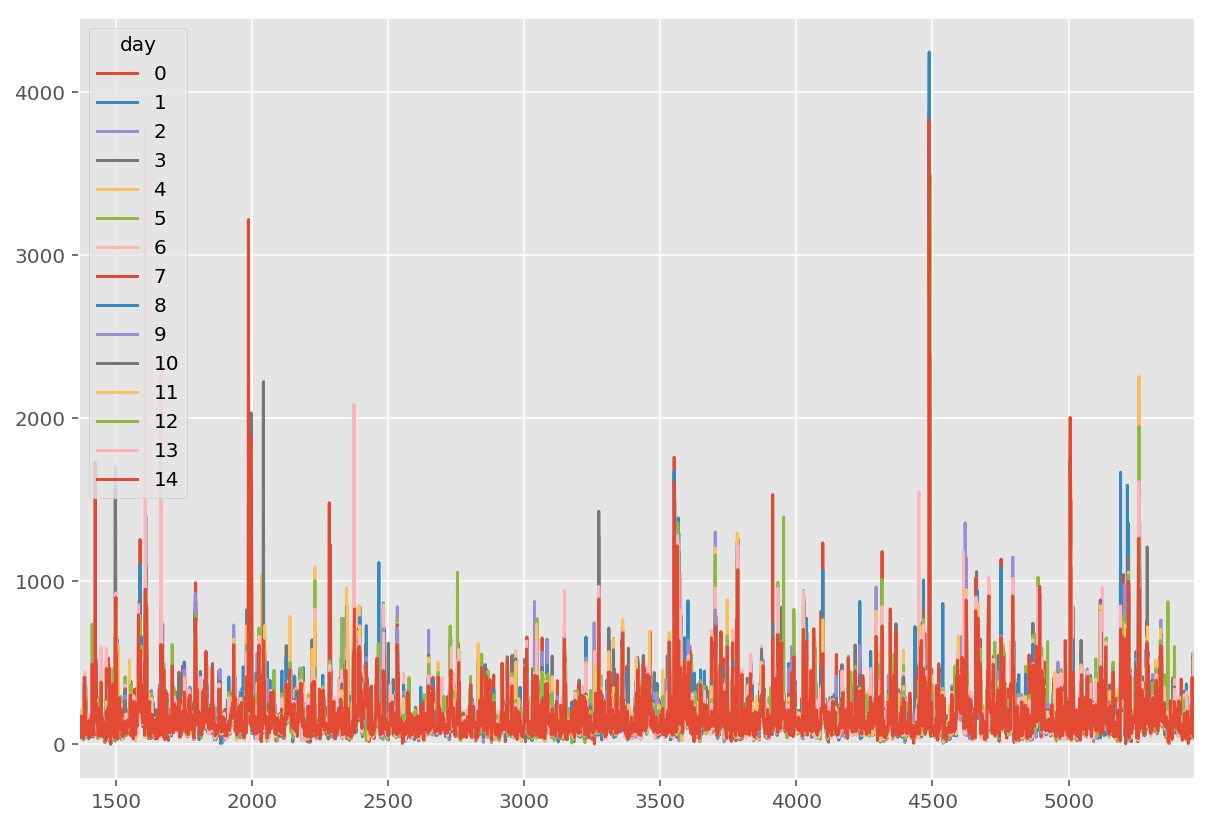

In [6]:
train_count = int(X.shape[0] * 0.25)

X_train = X[train_count:]

X_train.plot()

## Network Model

In [7]:
import tensorflow as tf
sess = tf.InteractiveSession()


In [8]:

input_nodes_num = 15
output_nodes_num = 15

tf_x = tf.placeholder(tf.float32, [None, input_nodes_num],name='Inputs')
tf_y_ = tf.placeholder(tf.float32, [None, output_nodes_num], name='ActualOutput')

tf_W = tf.Variable(tf.truncated_normal([input_nodes_num, output_nodes_num]),name='Weights')
tf_b = tf.Variable(tf.zeros([output_nodes_num]),name='bias')

tf_y = tf.add(tf.matmul(tf_x, tf_W), tf_b)

tf_y_predict_ = tf.add(tf.matmul(tf_x, tf_W), tf_b)

sq_diff = 0.5 * tf.reduce_sum(tf.squared_difference( tf_y_ , tf_y), name = "Squared_Difference") / 200
#sq_diff_valid = 0.5 * tf.reduce_sum(tf.squared_difference(tf_y_, tf_y), name = "Squared_Difference") / 200

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(sq_diff)


In [9]:
X_train, X_valid, y_train, y_valid = fetch_data(input_nodes_num,output_nodes_num )

In [10]:
X_train.shape

(4100, 15)

In [11]:
y_train.shape

(4100, 15)

## Training the Network

- Network will be trained using Stochastic Gradient Descent.
- Learning rate is 0.01
- Epochs: 1000


Training (part of dataset) - epoch:0, loss:36.855079650878906
Training (whole dataset) - epoch:0, loss:995.0971069335938
Validation - epoch:0, loss:359.1541748046875
****
Training (part of dataset) - epoch:200, loss:5.270008563995361
Training (whole dataset) - epoch:200, loss:101.15202331542969
Validation - epoch:200, loss:41.96613693237305
****
Training (part of dataset) - epoch:400, loss:1.312587857246399
Training (whole dataset) - epoch:400, loss:54.84556579589844
Validation - epoch:400, loss:24.48324966430664
****
Training (part of dataset) - epoch:600, loss:1.6874066591262817
Training (whole dataset) - epoch:600, loss:35.086788177490234
Validation - epoch:600, loss:16.6218318939209
****
Training (part of dataset) - epoch:800, loss:1.5018420219421387
Training (whole dataset) - epoch:800, loss:24.099287033081055
Validation - epoch:800, loss:11.642354965209961
****
Training (part of dataset) - epoch:1000, loss:0.7107456922531128
Training (whole dataset) - epoch:1000, loss:17.73923492

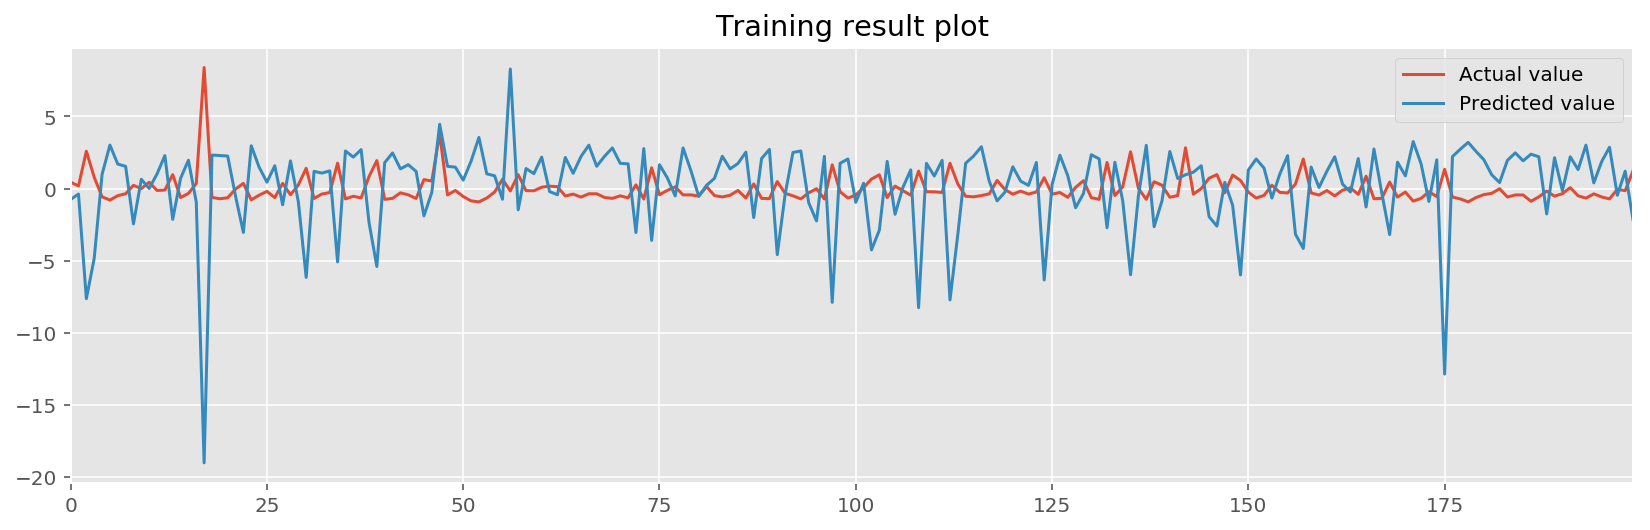

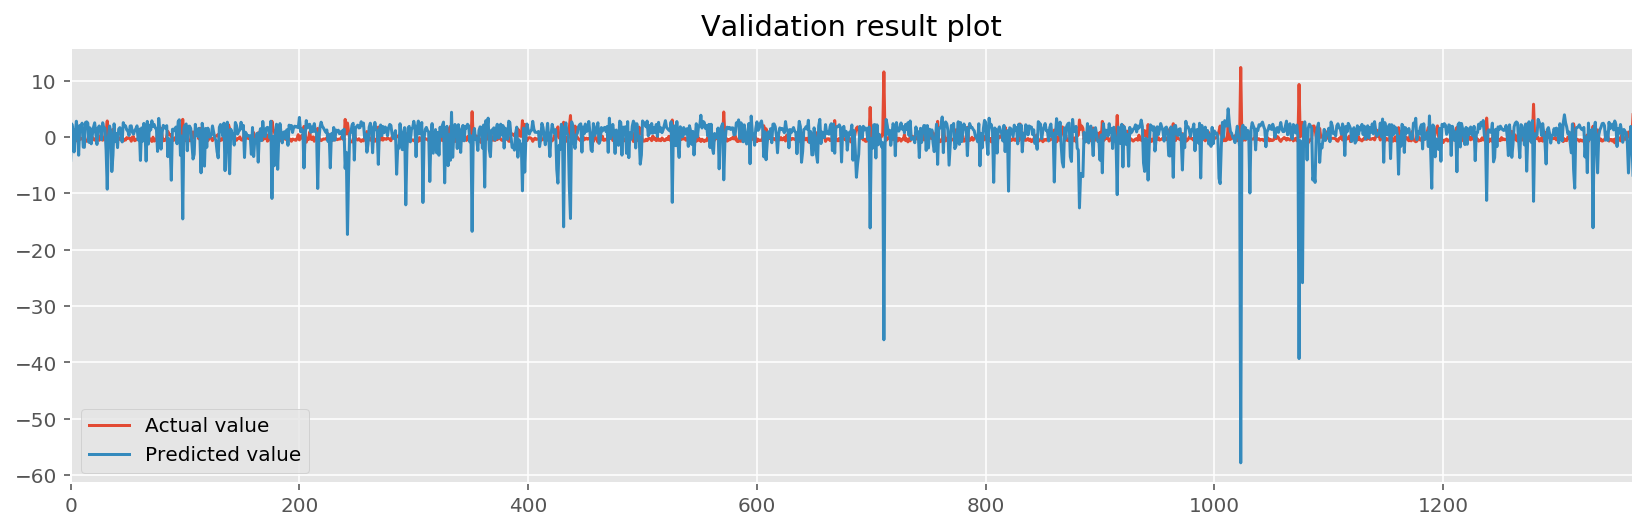

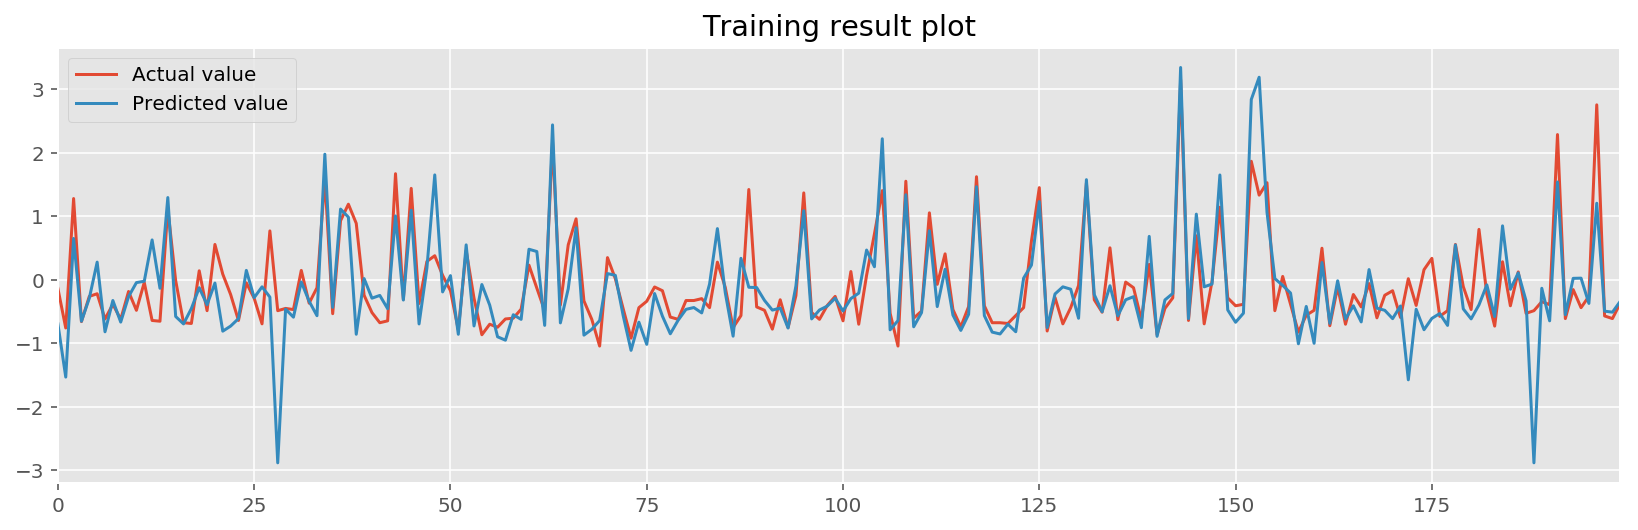

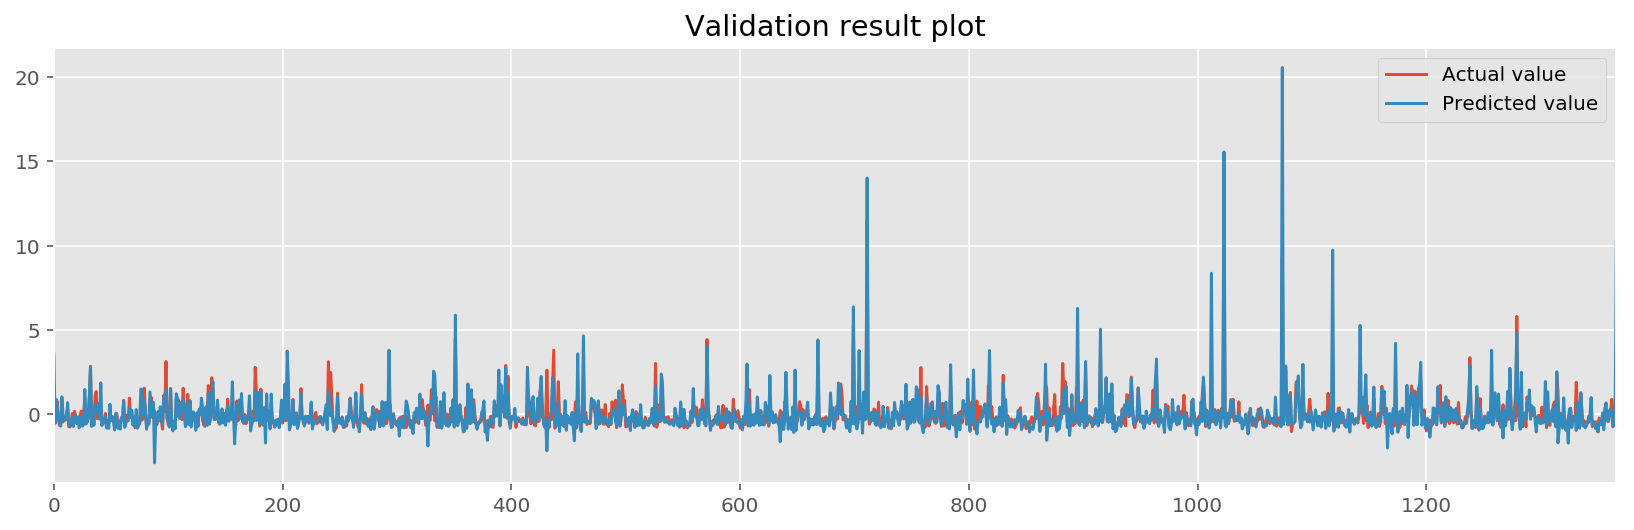

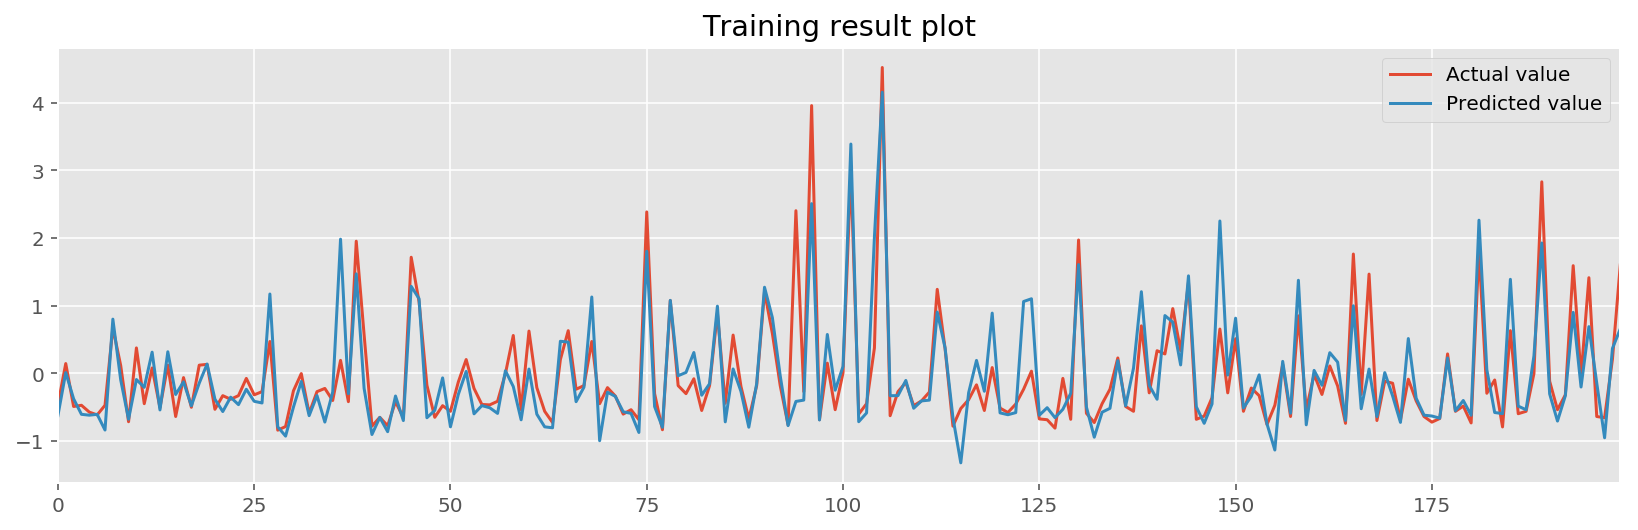

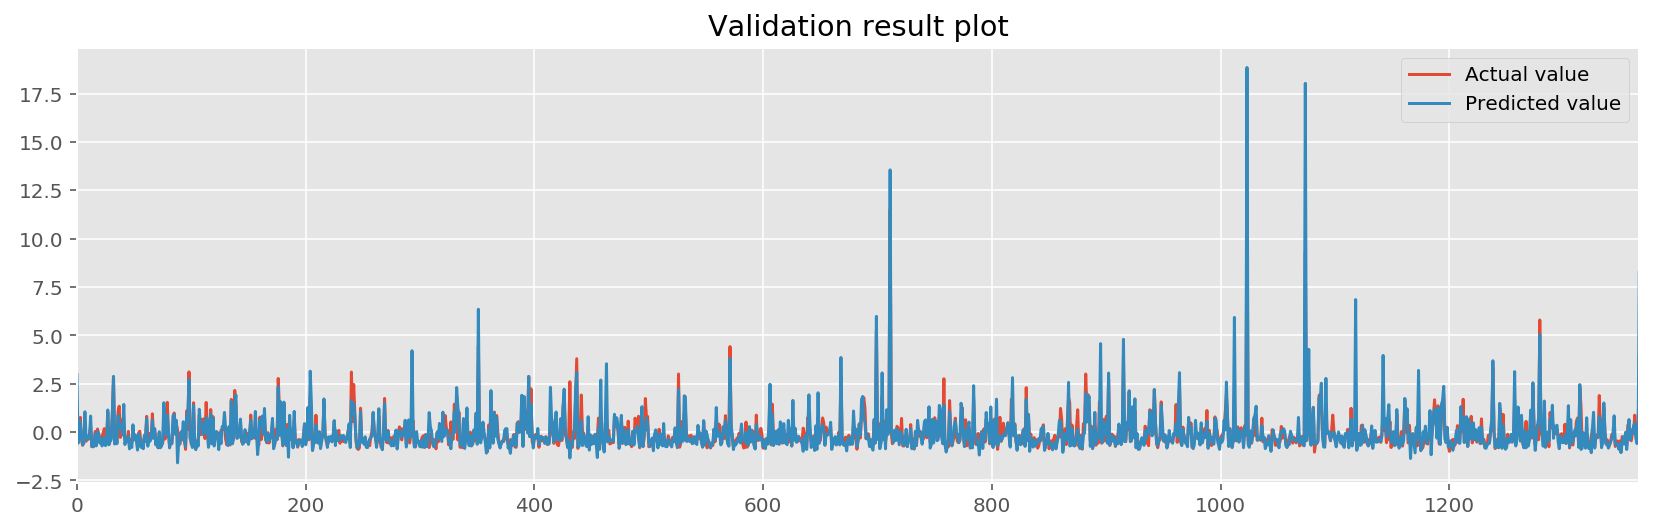

In [12]:
tf.initialize_all_variables().run()

losses = {'train':[], 'validation':[]}

for i in range(1001):
    index = np.random.randint(size=200,low = 0, high = X_train.shape[0])
    batch_xs = X_train[index,:]
    batch_ys = y_train[index,:]
    
    _, tr_y, tr_sq_diff = sess.run([train_step, tf_y, sq_diff], feed_dict={tf_x: batch_xs, tf_y_:batch_ys })
    
    tv_y = tf_y.eval(feed_dict={tf_x: X_valid})
    vd_sq_diff = sq_diff.eval(feed_dict={tf_x: X_valid, tf_y_:y_valid})
    
    
    if i % 200 == 0:
        print ("Training (part of dataset) - epoch:{}, loss:{}".format(i, tr_sq_diff))
        tr_sq_diff = sess.run(sq_diff, feed_dict={tf_x: X_train, tf_y_: y_train})
        print ("Training (whole dataset) - epoch:{}, loss:{}".format(i, tr_sq_diff))
        
        losses['train'].append(tr_sq_diff)
        losses['validation'].append(vd_sq_diff)
        
        print("Validation - epoch:{}, loss:{}".format(i, vd_sq_diff))
        print("****")

    if i % 500 == 0:

        answer_train = pd.DataFrame({"Predicted value":tr_y[:,output_nodes_num - 1], "Actual value":batch_ys[:,output_nodes_num - 1]})
        answer_train.plot(title='Training result plot', figsize=[14,4])

        answer_valid = pd.DataFrame({"Predicted value":tv_y[:, output_nodes_num - 1], "Actual value":y_valid[:,output_nodes_num - 1]})
        answer_valid.plot(title = 'Validation result plot', figsize=[14,4])

### Plotting Loss

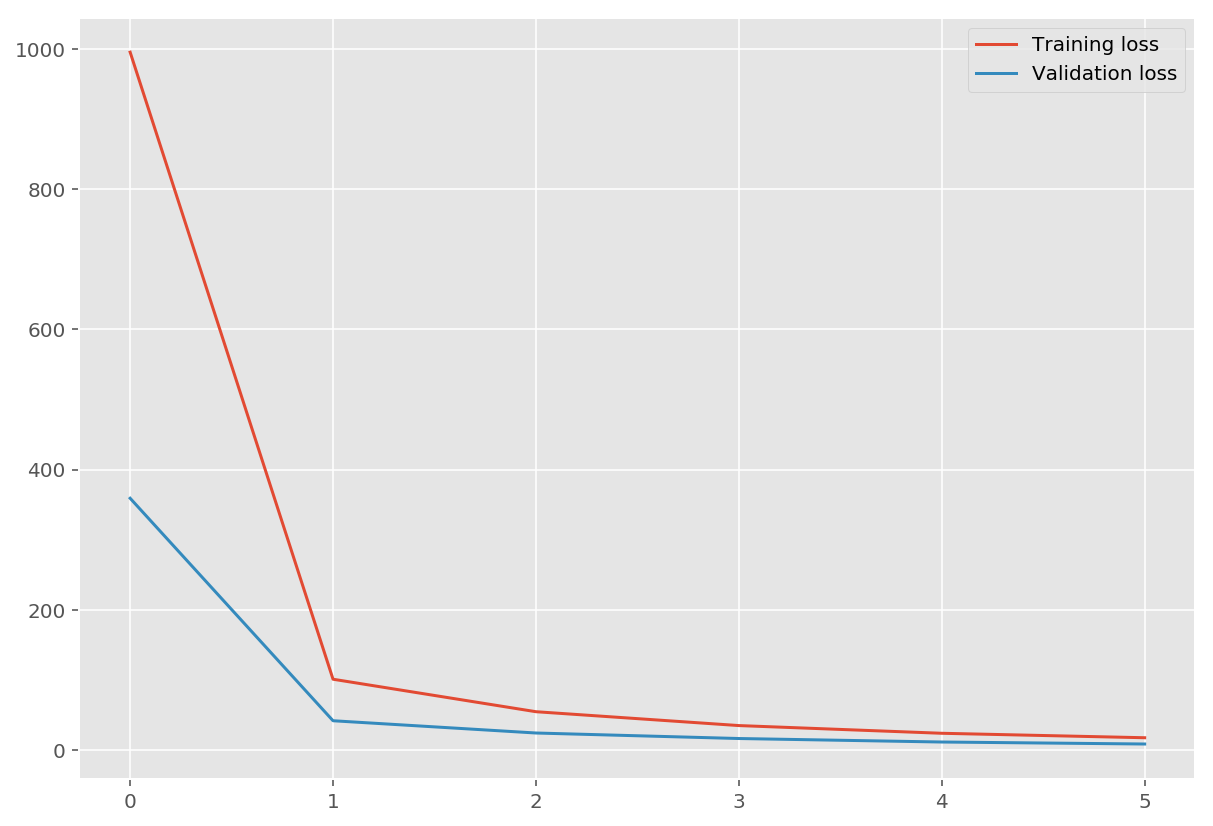

In [13]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
#plt.ylim(ymax=0.5)